# Analisis de Componentes Principales

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Datos

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


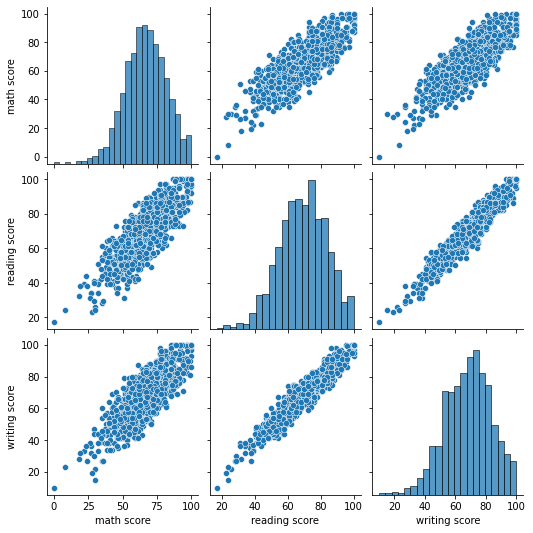

In [6]:
sns.pairplot(df)

### Preparamos los datos

In [7]:
students = pd.get_dummies(df,columns=["gender","race/ethnicity","parental level of education","lunch","test preparation course"])
pd.get_dummies(df,columns=["gender","race/ethnicity","parental level of education","lunch","test preparation course"],drop_first=True)

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


## Visualizacion PCA

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(students)

StandardScaler()

In [10]:
scaled_data = scaler.transform(students)
scaled_data

array([[ 0.39002351,  0.19399858,  0.39149181, ...,  0.74188112,
        -0.74674788,  0.74674788],
       [ 0.19207553,  1.42747598,  1.31326868, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 1.57771141,  1.77010859,  1.64247471, ...,  0.74188112,
        -0.74674788,  0.74674788],
       ...,
       [-0.46775108,  0.12547206, -0.20107904, ..., -1.34792485,
         1.33914006, -1.33914006],
       [ 0.12609287,  0.60515772,  0.58901542, ...,  0.74188112,
         1.33914006, -1.33914006],
       [ 0.71993682,  1.15336989,  1.18158627, ..., -1.34792485,
        -0.74674788,  0.74674788]])

Utilizamos PCA con Scikit Learn

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(scaled_data)

PCA(n_components=2)

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(1000, 20)

In [16]:
x_pca.shape

(1000, 2)

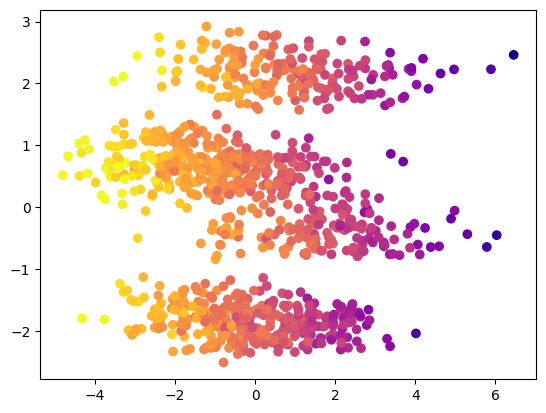

In [17]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=students['writing score'],cmap='plasma')


## Interpretacion

In [18]:
pca.n_components

2

In [19]:
pca.components_

array([[-4.37653696e-01, -4.81267696e-01, -4.98779434e-01,
        -1.28754478e-01,  1.28754478e-01,  7.91993877e-02,
         5.21418928e-02,  7.24137464e-03, -2.11109491e-02,
        -1.06917555e-01, -5.14921924e-02, -6.55888543e-02,
         1.22573560e-01, -5.89487590e-02, -1.79197076e-02,
         3.98741813e-02,  2.56979362e-01, -2.56979362e-01,
        -2.39314719e-01,  2.39314719e-01],
       [-2.26125441e-01,  7.09100867e-02,  1.02810491e-01,
         5.74050428e-01, -5.74050428e-01, -6.57399248e-02,
         3.59140575e-02,  1.17566984e-01, -5.45044462e-02,
        -7.55069413e-02, -2.52106960e-04,  2.17888167e-02,
        -4.02361761e-02,  7.16075358e-02, -9.36218327e-03,
        -1.01965037e-02,  3.37557884e-01, -3.37557884e-01,
         7.34574682e-02, -7.34574682e-02]])

In [20]:
df_comp = pd.DataFrame(pca.components_,columns=students.columns.values)

<AxesSubplot:>

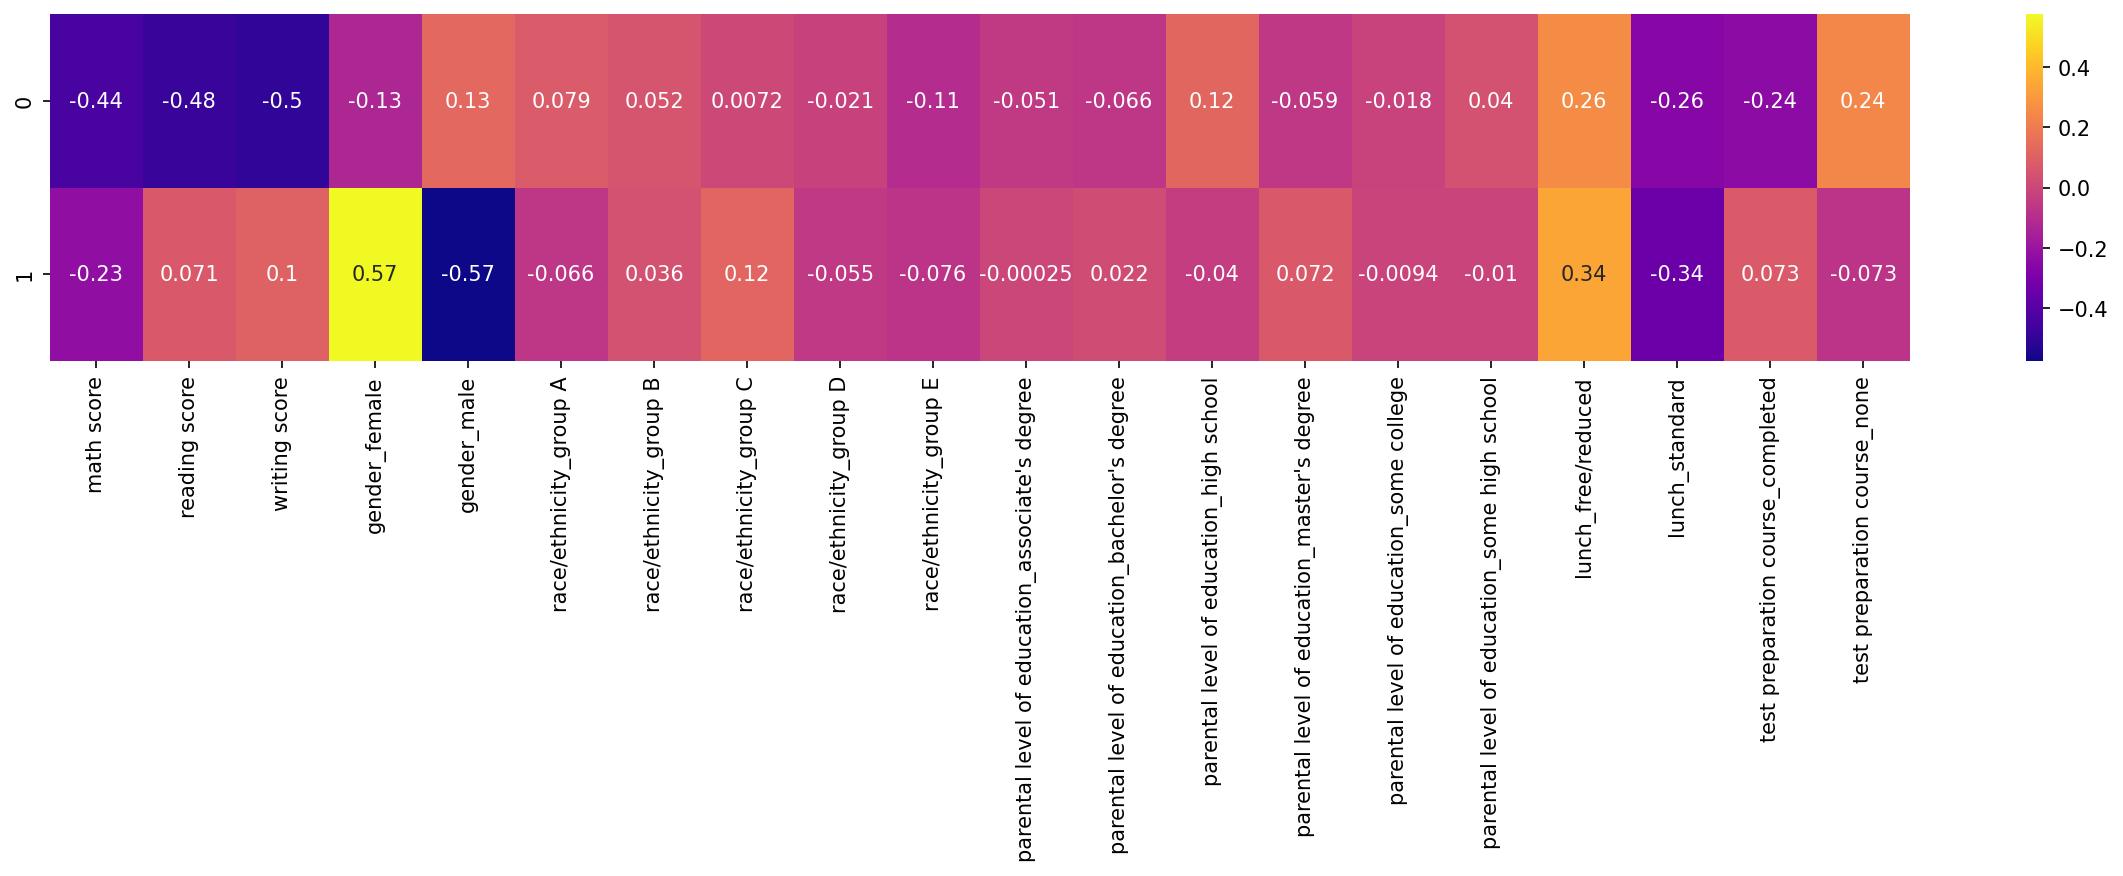

In [21]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,cmap='plasma',annot=True)

**Varianza Explicada**

In [22]:
pca.explained_variance_ratio_

array([0.17374741, 0.11042157])

In [23]:
np.sum(pca.explained_variance_ratio_)

0.28416898251267797

In [24]:
pca_20 = PCA(n_components=20)
pca_20.fit(scaled_data)

PCA(n_components=20)

In [25]:
pca_20.explained_variance_ratio_

array([1.73747804e-01, 1.10451932e-01, 1.02012582e-01, 7.84137794e-02,
       7.16558785e-02, 6.58251824e-02, 6.28314391e-02, 6.16108829e-02,
       5.98425126e-02, 5.58519543e-02, 5.27518876e-02, 5.11958284e-02,
       4.79759970e-02, 4.14555304e-03, 1.68678761e-03, 1.14766571e-32,
       7.79249571e-33, 2.30570642e-33, 1.49565723e-33, 1.39527190e-34])

In [26]:
np.sum(pca_20.explained_variance_ratio_)

1.0

In [27]:
varianza_explicada=[]
for n in range(1,21):
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    varianza_explicada.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varianza Explicada')

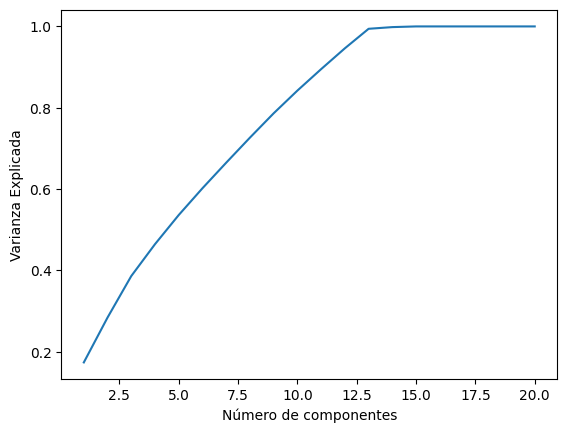

In [28]:
plt.plot(range(1,21),varianza_explicada)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza Explicada")

# Conclusiones

Conforme el numero de componentes aumenta la variacion de la columna objetivo (math_score) aumenta, al llegar a las 13 columnas eesta variacion se estabiliza y se vuelve constante